In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import topcorr as tpc
import networkx as nx

#import bct
import enlighten

from os.path import join
import warnings

import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
from sklearn.ensemble import IsolationForest


In [215]:
# SYSTEM SEGREGATION FUNCTION
# called twice: once for baseline & once for y2fu

def sys_seg(wthn, btwn, ppts):
    networks = ['dt', 'ca', 'smh', 'dla', 'ad', 'smm', 'sa', 'fo', 'vs', 'cgc', 'vta', 'rspltp']
    df = pd.DataFrame(
        dtype=float, 
        columns=networks,
        index=ppts
    )
    
    for network in networks:
        btwn_cols = []
        for col in wthn.columns:
            if network in col:
                temp_wthn = wthn[col]
            else:
                pass
        for col in btwn.columns:
            if network in col:
                btwn_cols.append(col)
        temp_btwn = btwn[btwn_cols]
        for p in ppts:
            try:
                i = temp_wthn.loc[p]
                x = temp_btwn.loc[p]
                mean = np.mean(x)
                # this is the system segregation formula
                value = (i - mean)/i
                df.at[p, network] = value
            except:
                pass

    return df


In [4]:
PROJ_DIR = "/Volumes/projects_herting/LABDOCS/Personnel/Katie/deltaABCD_clustering/"
DATA_DIR = "data/"
FIGS_DIR = "figures/"
OUTP_DIR = "output/"

df = pd.read_pickle(join(PROJ_DIR, DATA_DIR, "data_qcd.pkl"))

In [5]:
base_age = df[["interview_age.baseline_year_1_arm_1"]]
base_age=base_age.dropna()
value=12
base_age=(base_age//value)
base_age=base_age.rename(columns={"interview_age.baseline_year_1_arm_1": "age"})
#base_age=base_age.rename_axis('src_subject_id')
base_age.columns = pd.MultiIndex.from_product([['base'], ['age']])
print(base_age)

                  base
                   age
subjectkey            
NDAR_INV07HGA3B7   9.0
NDAR_INV07RAHHYH   9.0
NDAR_INV08P1JKNE   9.0
NDAR_INV09AUXBBT   9.0
NDAR_INV09ZE6UUK   9.0
...                ...
NDAR_INVXXHGW734  10.0
NDAR_INVZKJXBJMM   9.0
NDAR_INVZKT1BV8Y   9.0
NDAR_INVVKPJ803Y   9.0
NDAR_INVVLHZP6FR   9.0

[7438 rows x 1 columns]


In [ ]:
y2fu_age = df[["interview_age.2_year_follow_up_y_arm_1"]]
y2fu_age=y2fu_age.dropna()
value=12
y2fu_age=(y2fu_age//value).round(2)
y2fu_age=y2fu_age.rename(columns={"interview_age.2_year_follow_up_y_arm_1": "age"})
#y2fu_age=y2fu_age.rename_axis('src_subject_id')
y2fu_age.columns = pd.MultiIndex.from_product([['y2fu'], ['age']])
print(y2fu_age)

In [6]:
ppts = df.filter(regex="rsfmri_c_.*change_score").dropna().index

base_rsfc = pd.read_pickle(
    join(PROJ_DIR, DATA_DIR, 'rsfc_sans_motion-baseline.pkl')
).dropna()

y2fu_rsfc = pd.read_pickle(
    join(PROJ_DIR, DATA_DIR, 'rsfc_sans_motion-2yearfup.pkl')
).dropna()

In [7]:
ntwks = ['dt', 'ca', 'smh', 'dla', 'ad', 'smm', 'sa', 'fo', 'vs', 'cgc', 'vta', 'rspltp']

In [8]:
nones = list(base_rsfc.filter(regex='rsfmri_c_ngd_.*_ngd_n').columns) + list(base_rsfc.filter(regex='rsfmri_c_ngd_n_.*').columns)
base_rsfc = base_rsfc.drop(nones, axis=1)
y2fu_rsfc = y2fu_rsfc.drop(nones, axis=1)

In [9]:
tpts = [
    'baseline_year_1_arm_1',
    '2_year_follow_up_y_arm_1'
]

In [10]:
within_network = [i for i in base_rsfc.columns if i.split('_')[3] == i.split('_')[5]]

btwn = base_rsfc.columns

network_wise = {}

In [11]:
for i in [j.split('_')[3] for j in within_network]:
    network_wise[i] = [k for k in btwn if i == k.split('_')[3]]

In [12]:
between_network = [i for i in base_rsfc.columns if i.split('_')[3] != i.split('_')[5]]


In [13]:
# BASELINE WITHIN VALUES 

base_wthn = pd.DataFrame(dtype=float)
value=[]
for i in base_rsfc.columns:
    for conn in within_network:
        if i == conn:
            values = [base_rsfc[i]]
            for x in values:
                value.append(x)
                values = pd.DataFrame(value).T
                #values.head()
                base_wthn = pd.concat((base_wthn, values), ignore_index=False, axis = 1)
                base_wthn=base_wthn.T.drop_duplicates().T
base_wthn



,rsfmri_c_ngd_ad_ngd_ad,rsfmri_c_ngd_cgc_ngd_cgc,rsfmri_c_ngd_ca_ngd_ca,rsfmri_c_ngd_dt_ngd_dt,rsfmri_c_ngd_dla_ngd_dla,rsfmri_c_ngd_fo_ngd_fo,rsfmri_c_ngd_rspltp_ngd_rspltp,rsfmri_c_ngd_sa_ngd_sa,rsfmri_c_ngd_smh_ngd_smh,rsfmri_c_ngd_smm_ngd_smm,rsfmri_c_ngd_vta_ngd_vta,rsfmri_c_ngd_vs_ngd_vs
src_subject_id,,,,,,,,,,,,
NDAR_INV003RTV85,0.156148,0.137690,0.155557,0.094108,0.070524,0.013673,0.101440,0.111034,0.029877,0.015169,-0.004592,-0.054751
NDAR_INV005V6D2C,-0.035852,-0.060649,-0.172087,-0.040864,-0.018154,-0.083706,0.254694,-0.128910,0.019601,-0.067692,-0.062127,-0.075134
NDAR_INV007W6H7B,-0.020474,0.029704,-0.009482,0.020118,-0.004533,0.043262,0.217544,-0.128268,0.003089,0.078017,0.017714,-0.028429
NDAR_INV00BD7VDC,-0.068035,-0.010213,-0.056462,0.016114,-0.024096,-0.002337,-0.120513,-0.062580,0.056614,-0.114579,-0.067162,-0.083532
NDAR_INV00CY2MDM,0.088709,-0.080691,0.071245,0.018339,-0.101540,0.100133,0.017011,0.095891,0.155761,0.259651,0.002039,0.081144
...,...,...,...,...,...,...,...,...,...,...,...,...
NDAR_INVZZLZCKAY,0.013893,0.034576,-0.150657,-0.013669,-0.014665,0.032224,0.100898,0.073126,-0.050222,0.063212,-0.039327,-0.057136
NDAR_INVZZNX6W2P,0.027670,0.087291,-0.033746,-0.003612,0.070618,0.046298,0.207972,0.191024,0.093532,0.113263,-0.000945,0.055783
NDAR_INVZZPKBDAC,0.088569,0.125065,0.183325,0.023290,0.022117,-0.010961,-0.006633,0.133183,-0.061136,0.248408,0.029018,0.035981


In [14]:
### BASELINE BETWEEN VALUES 

base_btwn = pd.DataFrame(dtype=float)
value=[]
for i in base_rsfc.columns:
    for conn in between_network:
        if i == conn:
            values = [base_rsfc[i]]
            for x in values:
                value.append(x)
                values = pd.DataFrame(value).T
                #values.head()
                base_btwn = pd.concat((base_btwn, values), ignore_index=False, axis = 1)
                base_btwn=base_btwn.T.drop_duplicates().T
base_btwn


,rsfmri_c_ngd_ad_ngd_cgc,rsfmri_c_ngd_ad_ngd_ca,rsfmri_c_ngd_ad_ngd_dt,rsfmri_c_ngd_ad_ngd_dla,rsfmri_c_ngd_ad_ngd_fo,rsfmri_c_ngd_ad_ngd_rspltp,rsfmri_c_ngd_ad_ngd_sa,rsfmri_c_ngd_ad_ngd_smh,rsfmri_c_ngd_ad_ngd_smm,rsfmri_c_ngd_ad_ngd_vta,...,rsfmri_c_ngd_sa_ngd_smh,rsfmri_c_ngd_sa_ngd_smm,rsfmri_c_ngd_sa_ngd_vta,rsfmri_c_ngd_sa_ngd_vs,rsfmri_c_ngd_smh_ngd_smm,rsfmri_c_ngd_smh_ngd_vta,rsfmri_c_ngd_smh_ngd_vs,rsfmri_c_ngd_smm_ngd_vta,rsfmri_c_ngd_smm_ngd_vs,rsfmri_c_ngd_vta_ngd_vs
src_subject_id,,,,,,,,,,,,,,,,,,,,,
NDAR_INV003RTV85,0.083080,-0.005397,-0.070424,0.046748,0.001818,0.004988,-0.030610,0.064919,0.006647,-0.042116,...,-0.048041,0.116120,0.068478,-0.064468,-0.044324,-0.045571,-0.004062,-0.059810,0.066886,-0.046211
NDAR_INV005V6D2C,-0.056556,0.135977,0.018721,0.019969,0.013570,0.071587,0.015149,-0.023567,0.016625,-0.026178,...,0.065137,0.058175,0.003531,0.023037,-0.044242,0.022115,-0.005814,-0.029015,0.049039,0.031783
NDAR_INV007W6H7B,0.036443,-0.000806,-0.091431,-0.008721,0.083046,-0.130949,0.036883,-0.037463,0.035290,0.006950,...,0.037564,0.035819,-0.072490,0.067212,-0.008292,-0.001222,0.002535,0.011208,0.035753,0.035325
NDAR_INV00BD7VDC,-0.007951,-0.023327,0.000871,0.037394,0.014134,-0.078726,0.055280,0.023946,-0.051194,0.033335,...,0.082224,0.010111,0.059552,0.014482,-0.034436,0.018499,0.032095,-0.005161,-0.074590,0.014961
NDAR_INV00CY2MDM,0.010482,-0.077209,-0.033068,-0.029951,-0.110620,0.021778,-0.085737,0.198650,0.255900,-0.006862,...,-0.080239,-0.193227,-0.025325,-0.130030,0.286758,0.032730,0.088992,0.053129,0.129850,-0.027237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDAR_INVZZLZCKAY,0.007885,0.051244,0.017297,-0.015021,-0.031156,-0.021115,0.082900,-0.016838,-0.042464,-0.002471,...,0.066349,0.015294,-0.016546,0.058267,-0.066092,0.008667,0.006893,0.000500,-0.039735,0.036298
NDAR_INVZZNX6W2P,-0.030621,0.015725,0.000832,0.019413,0.051752,-0.009655,-0.050194,0.015407,0.033127,0.017575,...,-0.063224,-0.027964,0.118082,-0.057426,0.021061,-0.007182,-0.020285,0.002045,-0.017529,-0.015671
NDAR_INVZZPKBDAC,0.127507,-0.095815,-0.048096,-0.020891,0.057348,-0.104345,0.155268,-0.082119,0.130225,0.106994,...,-0.032956,0.186434,0.091017,0.074645,-0.135835,-0.009889,-0.038702,0.109829,0.039067,-0.018632


In [15]:
# Y2FU WITHIN VALUES 

y2fu_wthn = pd.DataFrame(dtype=float)
value=[]
for i in y2fu_rsfc.columns:
    for conn in within_network:
        if i == conn:
            values = [y2fu_rsfc[i]]
            for x in values:
                value.append(x)
                values = pd.DataFrame(value).T
                #values.head()
                y2fu_wthn = pd.concat((y2fu_wthn, values), ignore_index=False, axis = 1)
                y2fu_wthn=y2fu_wthn.T.drop_duplicates().T
#y2fu_wthn


In [16]:
# Y2FU BETWEEN VALUES 

y2fu_btwn = pd.DataFrame(dtype=float)
value=[]
for i in y2fu_rsfc.columns:
    for conn in between_network:
        if i == conn:
            values = [y2fu_rsfc[i]]
            for x in values:
                value.append(x)
                values = pd.DataFrame(value).T
                #values.head()
                y2fu_btwn = pd.concat((y2fu_btwn, values), ignore_index=False, axis = 1)
                y2fu_btwn=y2fu_btwn.T.drop_duplicates().T
#y2fu_btwn

In [ ]:
# NOT SAVED OUT

#y2fu_wthn.to_csv(join(PROJ_DIR, OUTP_DIR, 'y2fu_wthn_raw.csv'))
#y2fu_btwn.to_csv(join(PROJ_DIR, OUTP_DIR, 'y2fu_btwn_raw.csv'))
#base_wthn.to_csv(join(PROJ_DIR, OUTP_DIR, 'base_wthn_raw.csv'))
#base_btwn.to_csv(join(PROJ_DIR, OUTP_DIR, 'base_btwn_raw.csv'))

In [216]:
# BASELINE SYSTEM SEGREGATION

base_sys_seg = sys_seg(base_wthn, base_btwn, ppts)
base_sys_seg=base_sys_seg.dropna()
base_sys_seg

,dt,ca,smh,dla,ad,smm,sa,fo,vs,cgc,vta,rspltp
subjectkey,,,,,,,,,,,,
NDAR_INV07HGA3B7,0.984222,1.035408,1.117621,0.868134,-0.577080,1.191647,0.768339,0.923079,1.152011,1.192528,1.036678,0.588595
NDAR_INV07RAHHYH,1.470902,0.937534,2.310113,1.032651,-1.086749,0.991357,0.988295,0.557901,0.914989,0.952494,19.359044,0.582380
NDAR_INV09AUXBBT,1.195306,0.889530,0.849507,0.570904,0.697025,0.883532,1.484452,0.813507,1.009271,0.813360,1.157665,0.995575
NDAR_INV0DC9BJZK,0.970420,0.602298,1.063094,1.432452,1.141527,1.035331,0.791935,1.465461,0.731558,0.635026,1.268228,1.402752
NDAR_INV0DJJP33V,0.867604,0.923541,1.801648,1.148365,1.122208,3.999964,0.875636,0.820424,1.274649,1.139964,0.951677,0.521721
...,...,...,...,...,...,...,...,...,...,...,...,...
NDAR_INVZEAUYCZF,1.037911,1.044291,0.841909,0.747311,0.851742,1.066820,0.886468,0.733560,1.125481,0.770121,0.542761,1.492858
NDAR_INVXWW4FAU3,1.159508,1.038474,-1.935992,0.303077,-7.853713,1.138241,1.237618,0.706927,1.120221,0.849242,0.906200,1.001849
NDAR_INVZKJXBJMM,1.591464,1.007111,7.959433,2.738304,0.936116,1.643016,1.808122,1.242459,1.109543,0.998735,0.750450,-0.249175


In [217]:
# removing outliers from the base sys seg 

# initializing the IsolationForest model
model = IsolationForest(contamination=0.15)  
model.fit(base_sys_seg)
outliers = model.predict(base_sys_seg)
base_sys_seg['Outlier'] = outliers

# removing outliers from df
base_ss_clean = base_sys_seg[base_sys_seg['Outlier'] == 1].drop(columns='Outlier')
base_ss_clean.describe()

,dt,ca,smh,dla,ad,smm,sa,fo,vs,cgc,vta,rspltp
count,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000
mean,1.084626,1.023616,0.967576,1.017243,0.888363,1.001694,0.952226,1.081009,1.046208,0.963088,1.066921,1.071683
std,1.375122,0.725902,1.599276,0.997602,1.098995,0.992629,1.063640,1.527271,1.387811,1.489674,1.553429,1.159958
min,-10.337450,-6.861944,-17.161397,-8.071755,-10.964492,-15.619086,-24.794731,-12.239859,-29.562501,-14.439648,-24.093379,-11.119389
25%,0.819063,0.904723,0.774607,0.820145,0.697065,0.867950,0.812404,0.793344,0.895511,0.722149,0.746541,0.878564
50%,1.097481,1.015256,0.973945,1.041290,0.885310,0.989665,0.976048,1.048377,1.102041,0.942185,1.042842,1.048336
75%,1.388835,1.125793,1.176755,1.262549,1.069186,1.115070,1.157914,1.327168,1.288550,1.180948,1.313268,1.225121
max,10.995449,9.028080,23.398262,7.937614,13.823818,12.809731,10.498916,24.048469,12.734986,18.804846,17.326072,15.660493


In [ ]:
# SAVED OUT
#base_sys_seg.to_csv(join(PROJ_DIR, OUTP_DIR, 'base_sys_seg.csv'))

In [218]:
# Y2FU SYSTEM SEGREGATION 

y2fu_sys_seg = sys_seg(y2fu_wthn, y2fu_btwn, ppts)
y2fu_sys_seg=y2fu_sys_seg.dropna()
y2fu_sys_seg

,dt,ca,smh,dla,ad,smm,sa,fo,vs,cgc,vta,rspltp
subjectkey,,,,,,,,,,,,
NDAR_INV07HGA3B7,0.926270,0.949379,0.781685,4.970084,0.995754,1.006298,1.119654,0.823090,1.054197,3.686257,1.191980,1.139302
NDAR_INV07RAHHYH,1.435982,0.937560,0.888847,0.499800,0.795263,0.966523,2.955886,1.057842,2.970962,1.627852,1.081139,1.128110
NDAR_INV09AUXBBT,0.900394,1.060368,1.082991,1.025281,0.956792,1.026637,1.099790,1.019222,1.157919,0.957541,1.385689,1.074325
NDAR_INV0DC9BJZK,1.327969,1.019902,1.108317,2.597996,1.162400,1.301659,1.107428,1.435090,1.408744,0.745852,-0.346526,1.068779
NDAR_INV0DJJP33V,0.980883,1.026680,0.912921,0.763876,0.483214,0.181618,1.015164,0.891346,1.370435,-6.573376,0.803000,1.027266
...,...,...,...,...,...,...,...,...,...,...,...,...
NDAR_INVZEYJBE3G,-0.550518,-0.067395,0.765420,1.659167,0.681876,0.953879,1.169988,0.730362,-0.201956,0.788945,-4.001692,1.905649
NDAR_INVXWW4FAU3,1.902421,0.896246,0.430138,1.154878,2.614608,1.006054,1.089383,1.011567,1.216035,1.328848,0.647351,0.991014
NDAR_INVZKJXBJMM,1.161109,1.126911,0.869230,0.861965,2.523410,0.775608,2.100115,1.133259,1.040895,1.250457,1.012614,1.094700


In [ ]:
# SAVED OUT
#y2fu_sys_seg.to_csv(join(PROJ_DIR, OUTP_DIR, 'y2fu_sys_seg.csv'))

In [219]:
# removing outliers from the base sys seg 

# initializing the IsolationForest model
model = IsolationForest(contamination=0.2)  
model.fit(y2fu_sys_seg)
outliers = model.predict(y2fu_sys_seg)
y2fu_sys_seg['Outlier'] = outliers

# removing outliers from df
y2fu_ss_clean = y2fu_sys_seg[y2fu_sys_seg['Outlier'] == 1].drop(columns='Outlier')
y2fu_ss_clean.describe()

,dt,ca,smh,dla,ad,smm,sa,fo,vs,cgc,vta,rspltp
count,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000
mean,1.139304,1.013861,0.955605,1.068184,0.912943,0.980939,0.965671,1.129602,1.059940,1.001751,1.048778,1.107493
std,1.172772,0.555002,0.804344,1.219106,0.920044,0.776921,0.698206,1.566530,1.221552,1.526715,0.953708,1.131122
min,-6.237486,-5.712864,-5.867686,-15.694021,-5.566729,-6.461631,-5.030228,-7.397866,-18.789232,-13.886906,-5.899356,-9.782638
25%,0.867301,0.901155,0.779516,0.824372,0.729640,0.857058,0.816050,0.805954,0.901429,0.733732,0.831062,0.894881
50%,1.134607,1.011546,0.953414,1.054176,0.903999,0.979959,0.975771,1.070898,1.099256,0.962471,1.077095,1.055093
75%,1.387819,1.132277,1.106501,1.289130,1.084107,1.106202,1.145306,1.334693,1.283796,1.184720,1.319225,1.235813
max,14.918200,5.659949,8.627960,11.626594,10.596376,10.225447,10.312277,34.021255,11.024096,37.739779,8.348426,16.282254


In [ ]:
# spring-embedded graph of our 12 brain networks 
# size of the dot/node for each network proportional to its within-network connectivity!
# BASELINE

In [ ]:
# spring-embedded graph of our 12 brain networks 
# size of the dot/node for each network proportional to its within-network connectivity!
# Y2FU


In [199]:
# multi index base ss
base_ss_clean.columns = pd.MultiIndex.from_product([['base'], base_ss_clean.columns])
base_ss_clean.dropna()

base                                                    \
                        dt        ca       smh       dla        ad       smm   
subjectkey                                                                     
NDAR_INV07HGA3B7  0.984222  1.035408  1.117621  0.868134 -0.577080  1.191647   
NDAR_INV09AUXBBT  1.195306  0.889530  0.849507  0.570904  0.697025  0.883532   
NDAR_INV0DC9BJZK  0.970420  0.602298  1.063094  1.432452  1.141527  1.035331   
NDAR_INV0DJJP33V  0.867604  0.923541  1.801648  1.148365  1.122208  3.999964   
NDAR_INV021403LF  0.983471  1.110566  0.951714  1.321608  1.807264  0.805875   
...                    ...       ...       ...       ...       ...       ...   
NDAR_INVZEAUYCZF  1.037911  1.044291  0.841909  0.747311  0.851742  1.066820   
NDAR_INVXWW4FAU3  1.159508  1.038474 -1.935992  0.303077 -7.853713  1.138241   
NDAR_INVZKJXBJMM  1.591464  1.007111  7.959433  2.738304  0.936116  1.643016   
NDAR_INVVKPJ803Y  0.945598  0.720829  1.402213  1.156098  1.080398  1.065038   
NDAR_INVVLHZP6FR  1.145471  1.404302  0.988225  0.951584  0.726505  1.208268   

                                                                              
                        sa        fo        vs       cgc       vta    rspltp  
subjectkey                                                                    
NDAR_INV07HGA3B7  0.768339  0.923079  1.152011  1.192528  1.036678  0.588595  
NDAR_INV09AUXBBT  1.484452  0.813507  1.009271  0.813360  1.157665  0.995575  
NDAR_INV0DC9BJZK  0.791935  1.465461  0.731558  0.635026  1.268228  1.402752  
NDAR_INV0DJJP33V  0.875636  0.820424  1.274649  1.139964  0.951677  0.521721  
NDAR_INV021403LF  0.809392 -7.441259  1.268483  0.391551  0.807424  1.289429  
...                    ...       ...       ...       ...       ...       ...  
NDAR_INVZEAUYCZF  0.886468  0.733560  1.125481  0.770121  0.542761  1.492858  
NDAR_INVXWW4FAU3  1.237618  0.706927  1.120221  0.849242  0.906200  1.001849  
NDAR_INVZKJXBJMM  1.808122  1.242459  1.109543  0.998735  0.750450 -0.249175  
NDAR_INVVKPJ803Y  0.792977  0.893136  1.278290  0.958950  0.928755  1.240364  
NDAR_INVVLHZP6FR  1.174135  0.463602  0.892603  1.154252  1.396573  1.061861  

[2910 rows x 12 columns]

In [200]:
# multi index y2fu ss
y2fu_ss_clean.columns = pd.MultiIndex.from_product([['y2fu'], y2fu_ss_clean.columns])
y2fu_ss_clean.dropna()

y2fu                                                    \
                        dt        ca       smh       dla        ad       smm   
subjectkey                                                                     
NDAR_INV07HGA3B7  0.926270  0.949379  0.781685  4.970084  0.995754  1.006298   
NDAR_INV07RAHHYH  1.435982  0.937560  0.888847  0.499800  0.795263  0.966523   
NDAR_INV09AUXBBT  0.900394  1.060368  1.082991  1.025281  0.956792  1.026637   
NDAR_INV0DC9BJZK  1.327969  1.019902  1.108317  2.597996  1.162400  1.301659   
NDAR_INV0DJJP33V  0.980883  1.026680  0.912921  0.763876  0.483214  0.181618   
...                    ...       ...       ...       ...       ...       ...   
NDAR_INVXRP6TZGT  1.968392  0.881229  0.872032  0.898260  0.705607  0.826090   
NDAR_INVZEAUYCZF  0.949934  1.069653  0.812931  1.140372  0.519843  1.157806   
NDAR_INVXWW4FAU3  1.902421  0.896246  0.430138  1.154878  2.614608  1.006054   
NDAR_INVZKJXBJMM  1.161109  1.126911  0.869230  0.861965  2.523410  0.775608   
NDAR_INVVKPJ803Y  1.093206  1.360819  1.123449  0.946820  2.090619  0.752800   

                                                                              
                        sa        fo        vs       cgc       vta    rspltp  
subjectkey                                                                    
NDAR_INV07HGA3B7  1.119654  0.823090  1.054197  3.686257  1.191980  1.139302  
NDAR_INV07RAHHYH  2.955886  1.057842  2.970962  1.627852  1.081139  1.128110  
NDAR_INV09AUXBBT  1.099790  1.019222  1.157919  0.957541  1.385689  1.074325  
NDAR_INV0DC9BJZK  1.107428  1.435090  1.408744  0.745852 -0.346526  1.068779  
NDAR_INV0DJJP33V  1.015164  0.891346  1.370435 -6.573376  0.803000  1.027266  
...                    ...       ...       ...       ...       ...       ...  
NDAR_INVXRP6TZGT  0.982035  1.130969  1.437787  0.934472  0.884926  0.967441  
NDAR_INVZEAUYCZF  0.721828  2.190902  1.126727  0.881727  0.095873  1.337067  
NDAR_INVXWW4FAU3  1.089383  1.011567  1.216035  1.328848  0.647351  0.991014  
NDAR_INVZKJXBJMM  2.100115  1.133259  1.040895  1.250457  1.012614  1.094700  
NDAR_INVVKPJ803Y  0.657217 -1.621591  1.264635  0.735573  0.969154  1.192929  

[2928 rows x 12 columns]

In [202]:
# concat clean base sys seg and y2fu sys seg 
ss_clean= pd.concat([base_ss_clean, y2fu_ss_clean], axis=1).dropna()
ss_clean.rename_axis('ppts', inplace=True)

ss_clean

base                                                    \
                        dt        ca       smh       dla        ad       smm   
ppts                                                                           
NDAR_INV07HGA3B7  0.984222  1.035408  1.117621  0.868134 -0.577080  1.191647   
NDAR_INV09AUXBBT  1.195306  0.889530  0.849507  0.570904  0.697025  0.883532   
NDAR_INV0DC9BJZK  0.970420  0.602298  1.063094  1.432452  1.141527  1.035331   
NDAR_INV0DJJP33V  0.867604  0.923541  1.801648  1.148365  1.122208  3.999964   
NDAR_INV0RG4KBRB  0.923215  1.044191  0.598249  1.031022  0.896823  1.079432   
...                    ...       ...       ...       ...       ...       ...   
NDAR_INVZB2K7UMG  0.963025  1.091958  1.214114  1.187217  0.432585  1.227780   
NDAR_INVZEAUYCZF  1.037911  1.044291  0.841909  0.747311  0.851742  1.066820   
NDAR_INVXWW4FAU3  1.159508  1.038474 -1.935992  0.303077 -7.853713  1.138241   
NDAR_INVZKJXBJMM  1.591464  1.007111  7.959433  2.738304  0.936116  1.643016   
NDAR_INVVKPJ803Y  0.945598  0.720829  1.402213  1.156098  1.080398  1.065038   

                                                          ...      y2fu  \
                        sa        fo        vs       cgc  ...       smh   
ppts                                                      ...             
NDAR_INV07HGA3B7  0.768339  0.923079  1.152011  1.192528  ...  0.781685   
NDAR_INV09AUXBBT  1.484452  0.813507  1.009271  0.813360  ...  1.082991   
NDAR_INV0DC9BJZK  0.791935  1.465461  0.731558  0.635026  ...  1.108317   
NDAR_INV0DJJP33V  0.875636  0.820424  1.274649  1.139964  ...  0.912921   
NDAR_INV0RG4KBRB  1.257838  1.103318  0.744205  0.768340  ...  3.065521   
...                    ...       ...       ...       ...  ...       ...   
NDAR_INVZB2K7UMG  0.694174  0.837696  0.764442  0.141045  ...  1.141025   
NDAR_INVZEAUYCZF  0.886468  0.733560  1.125481  0.770121  ...  0.812931   
NDAR_INVXWW4FAU3  1.237618  0.706927  1.120221  0.849242  ...  0.430138   
NDAR_INVZKJXBJMM  1.808122  1.242459  1.109543  0.998735  ...  0.869230   
NDAR_INVVKPJ803Y  0.792977  0.893136  1.278290  0.958950  ...  1.123449   

                                                                              \
                       dla        ad       smm        sa        fo        vs   
ppts                                                                           
NDAR_INV07HGA3B7  4.970084  0.995754  1.006298  1.119654  0.823090  1.054197   
NDAR_INV09AUXBBT  1.025281  0.956792  1.026637  1.099790  1.019222  1.157919   
NDAR_INV0DC9BJZK  2.597996  1.162400  1.301659  1.107428  1.435090  1.408744   
NDAR_INV0DJJP33V  0.763876  0.483214  0.181618  1.015164  0.891346  1.370435   
NDAR_INV0RG4KBRB  0.570996  0.935539  2.195067  0.671299  1.261999  0.708751   
...                    ...       ...       ...       ...       ...       ...   
NDAR_INVZB2K7UMG  1.336146  1.227733  1.150979  1.102844  1.611431  1.129655   
NDAR_INVZEAUYCZF  1.140372  0.519843  1.157806  0.721828  2.190902  1.126727   
NDAR_INVXWW4FAU3  1.154878  2.614608  1.006054  1.089383  1.011567  1.216035   
NDAR_INVZKJXBJMM  0.861965  2.523410  0.775608  2.100115  1.133259  1.040895   
NDAR_INVVKPJ803Y  0.946820  2.090619  0.752800  0.657217 -1.621591  1.264635   

                                                
                       cgc       vta    rspltp  
ppts                                            
NDAR_INV07HGA3B7  3.686257  1.191980  1.139302  
NDAR_INV09AUXBBT  0.957541  1.385689  1.074325  
NDAR_INV0DC9BJZK  0.745852 -0.346526  1.068779  
NDAR_INV0DJJP33V -6.573376  0.803000  1.027266  
NDAR_INV0RG4KBRB  1.939172 -0.093482  0.624475  
...                    ...       ...       ...  
NDAR_INVZB2K7UMG  1.114999  0.524644  0.456548  
NDAR_INVZEAUYCZF  0.881727  0.095873  1.337067  
NDAR_INVXWW4FAU3  1.328848  0.647351  0.991014  
NDAR_INVZKJXBJMM  1.250457  1.012614  1.094700  
NDAR_INVVKPJ803Y  0.735573  0.969154  1.192929  

[2070 rows x 24 columns]

In [203]:
# melt the sys_seg df to make some figures 

sys_seg_melt = ss_clean.melt(ignore_index =False)
sys_seg_melt


,variable_0,variable_1,value
ppts,,,
NDAR_INV07HGA3B7,base,dt,0.984222
NDAR_INV09AUXBBT,base,dt,1.195306
NDAR_INV0DC9BJZK,base,dt,0.970420
NDAR_INV0DJJP33V,base,dt,0.867604
NDAR_INV0RG4KBRB,base,dt,0.923215
...,...,...,...
NDAR_INVZB2K7UMG,y2fu,rspltp,0.456548
NDAR_INVZEAUYCZF,y2fu,rspltp,1.337067
NDAR_INVXWW4FAU3,y2fu,rspltp,0.991014


In [ ]:
base_ss=pd.concat([base_age, base_sys_seg], axis=1)
base_ss

In [ ]:
y2fu_ss=pd.concat([y2fu_age, y2fu_sys_seg], axis=1)
y2fu_ss

In [ ]:
# concat the above df with ppts age for base ss and y2fu ss
sys_seg_age= pd.concat([base_ss, y2fu_ss], axis=1).dropna()
sys_seg_age

In [ ]:
# melt the sys seg data frame with ppts ages 
ss_melt = sys_seg_age.melt(id_vars=[('base', 'age'),
                                   ('y2fu', 'age')], ignore_index =False)
#ss_melt.columns = [('base_age'), ('y2fu_age'), ('variable_0'), ('ntwks'), ('sys_seg')]
ss_melt=ss_melt.rename_axis('ppts')
ss_melt

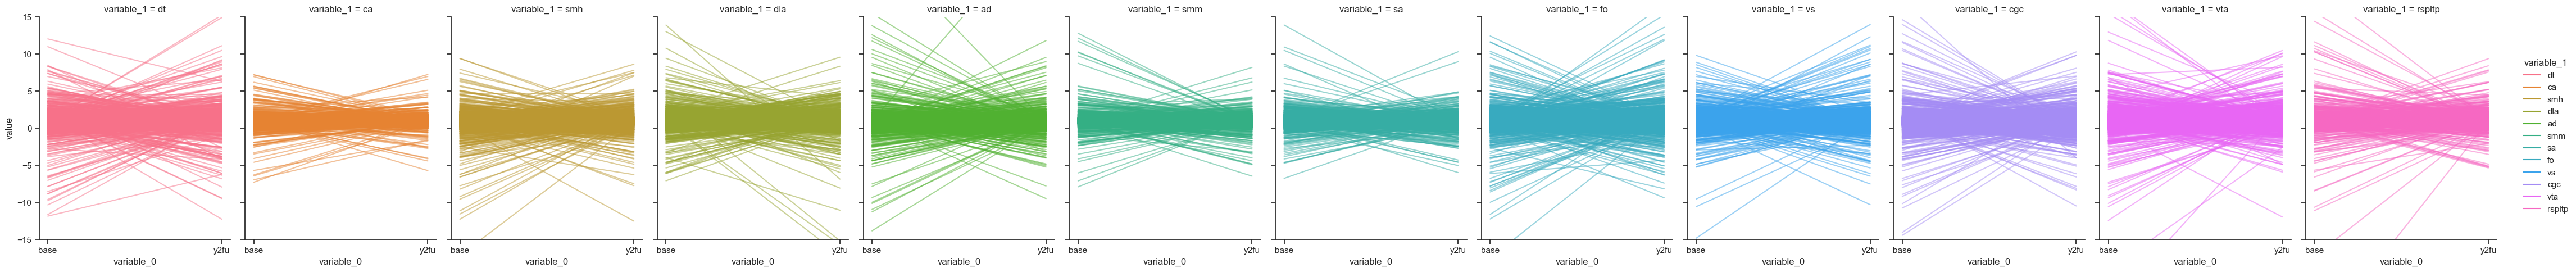

In [205]:
# SYS SEG SPAGHETTI PLOTS
# add age to the sys seg data frames

sns.set_theme(style="ticks")

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(sys_seg_melt, 
            kind = "line",
            x="variable_0", 
            y="value", hue="variable_1",  units="ppts", col="variable_1",
            alpha=0.50, height=5, aspect=.75,facet_kws=dict(sharex=True, sharey=True, ylim=(-15,15)), estimator=None,
           )

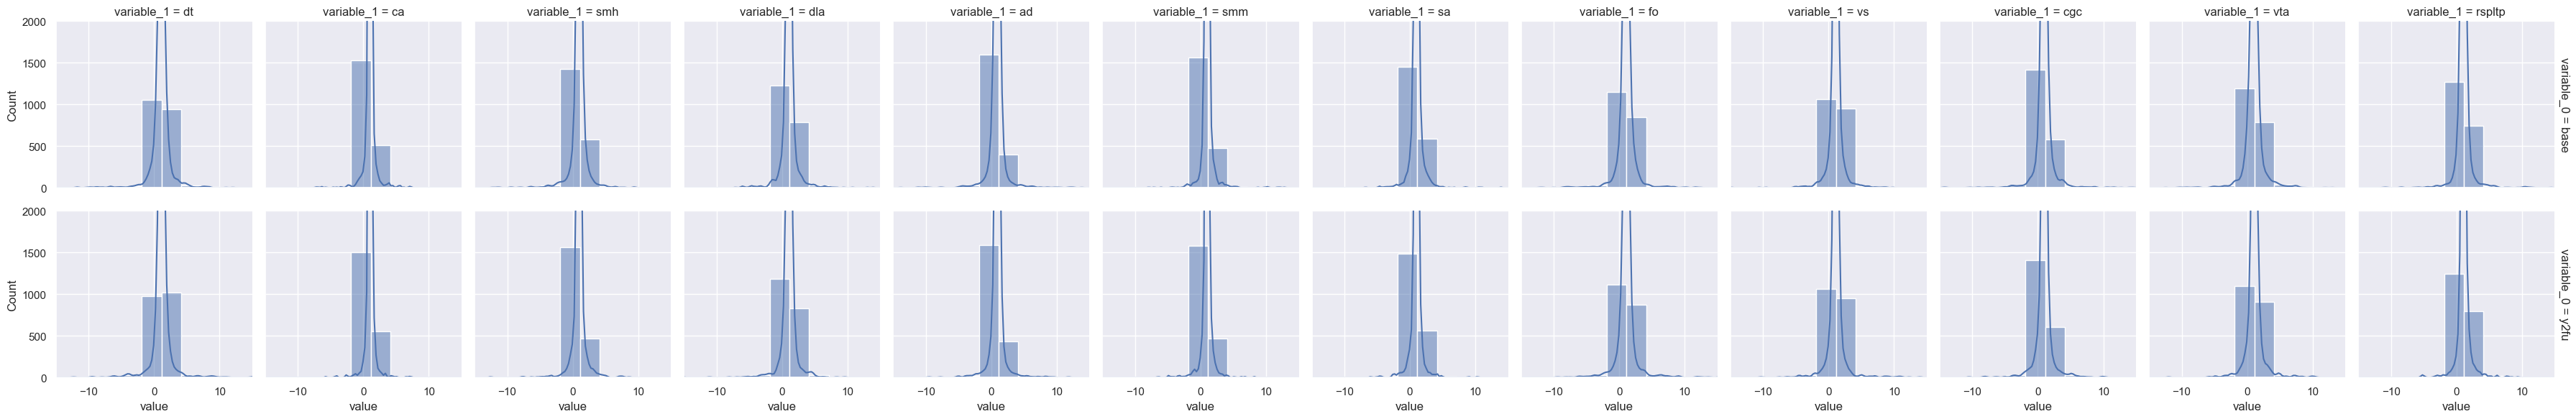

In [212]:
# make some histograms of ss

sns.set_theme(style="darkgrid")

sns.displot(
    sys_seg_melt, x ='value', row ='variable_0', col='variable_1',
    binwidth=3, height=3, facet_kws=dict(margin_titles=True, ylim=(-1,2000), xlim=(-15,15)), 
    kde=True
                                    )

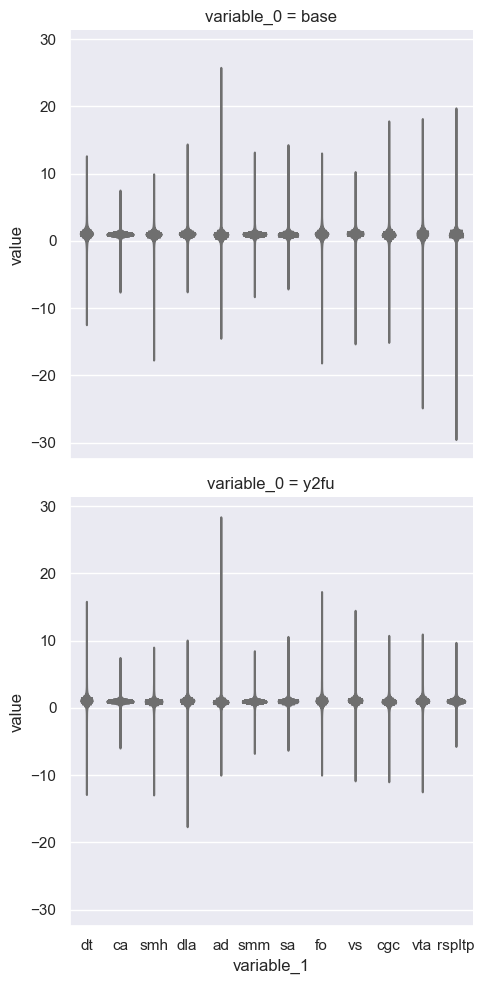

In [213]:
# violin plot of ss

sns.catplot(
    sys_seg_melt, x="variable_1", y="value", row="variable_0",
    kind="violin", inner="stick", split=True, palette="pastel",
    facet_kws=dict(sharex=True, sharey=True)
)

In [62]:
from scipy.stats import ttest_rel

In [108]:
# t tests between base and y2fu for each network for ss
ss_ttest = {}
base_sys_seg, y2fu_sys_seg = base_sys_seg.align(y2fu_sys_seg, axis=0)
for i in base_sys_seg:
    t_statistic, p_value = ttest_rel(base_sys_seg[i], y2fu_sys_seg[i], nan_policy='omit')
    ss_ttest[i] = {'t': t_statistic, 'p': p_value}
ss_ttest=pd.DataFrame(ss_ttest)
ss_ttest

,dt,ca,smh,dla,ad,smm,sa,fo,vs,cgc,vta,rspltp,Outlier
t,0.858630,-1.09070,1.146206,0.937908,-1.631078,-0.295884,0.979219,-1.118581,0.140692,-0.032004,0.868967,-0.090007,-0.253056
p,0.390612,0.27549,0.251799,0.348365,0.102976,0.767338,0.327548,0.263406,0.888122,0.974471,0.384933,0.928287,0.800242


In [71]:
# SAVED OUT
#ss_ttest.to_csv(join(PROJ_DIR, OUTP_DIR, 'sys_seg_ttest.csv'))

In [220]:
# t tests between base and y2fu for each network for ss
ss_ttest = {}
base_ss_clean, y2fu_ss_clean = base_ss_clean.align(y2fu_ss_clean, axis=0)
for i in base_ss_clean:
    t_statistic, p_value = ttest_rel(base_ss_clean[i], y2fu_ss_clean[i], nan_policy='omit')
    ss_ttest[i] = {'t': t_statistic, 'p': p_value}
ss_ttest_clean=pd.DataFrame(ss_ttest)
ss_ttest_clean=ss_ttest_clean.T
ss_ttest_clean.rename_axis('ntwrks', inplace=True)
ss_ttest_clean

,t,p
ntwrks,,
dt,-1.762882,0.078068
ca,0.902351,0.366975
smh,0.159833,0.873028
dla,-1.167132,0.243292
ad,-1.044446,0.296401
smm,0.948364,0.343055
sa,-0.991197,0.321705
fo,-0.837401,0.402464
vs,-0.043032,0.965680


In [221]:
# SAVED OUT
#ss_ttest_clean.to_csv(join(PROJ_DIR, OUTP_DIR, 'ss_ttest_no_outliers.csv'))

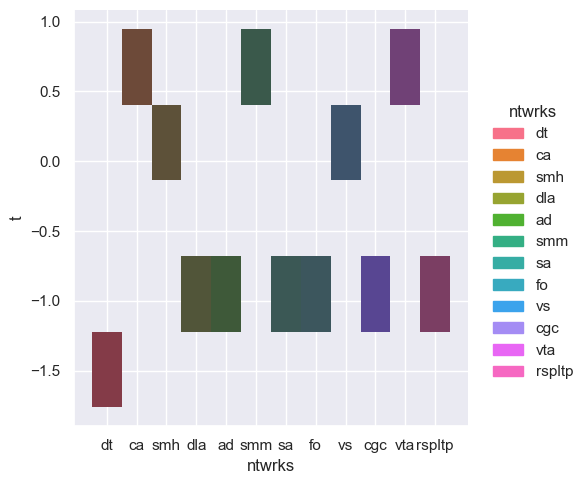

In [222]:
# make some histograms of ss T TESTS

sns.set_theme(style="darkgrid")

sns.displot(
    ss_ttest_clean, x="ntwrks",
    y="t", hue="ntwrks"
)

In [48]:
#wthn_heat = wthn_heat_map_melt.pivot(index=[''])
wthn_heat_map_melt

NameError: name 'wthn_heat_map_melt' is not defined

In [ ]:
# HEAT MAPS WTHN

base_wthn.columns = [('ad_base'), ('ca_base'), ('cgc_base'), ('dla_base'), ('dt_base'),
                     ('fo_base'), ('rspltp_base'), ('sa_base'), ('smh_base'), ('smm_base'), 
                     ('vs_base'), ('vta_base')]
y2fu_wthn.columns = [('ad_y2fu'), ('ca_y2fu'), ('cgc_y2fu'), ('dla_y2fu'), ('dt_y2fu'),
                     ('fo_y2fu'), ('rspltp_y2fu'), ('sa_y2fu'), ('smh_y2fu'), ('smm_y2fu'), 
                     ('vs_y2fu'), ('vta_y2fu')]

base_melt = base_wthn.melt()
y2fu_melt = y2fu_wthn.melt()
y2fu_melt.columns= [('y2fu'), ('val')]
wthn_melt = pd.concat([base_melt, y2fu_melt], axis=1)
#base_wthn
wthn_pivot = wthn_melt.pivot_table(index = 'variable', columns = 'y2fu', values=['value'])
#wthn_pivot
#////
# pivot= melt.pivot(index='variable', columns='value')
# pivot
# make a multi indexed df with base wthn and Y2FU WTHN
# pandas concat  
#base_wthn.columns = pd.MultiIndex.from_product([['base'], base_wthn.columns])
#base_wthn
# base_btwn_multi = pd.MultiIndex.from_frame([['base'], [base_btwn]])
# y2fu_wthn.columns = pd.MultiIndex.from_product([['y2fu'], y2fu_wthn.columns])
#wthn_heat_map = pd.concat([base_wthn, y2fu_wthn], axis=1).dropna()
# wthn_heat_map_melt = wthn_heat_map.melt()
# wthn_heat_map_melt
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(wthn_pivot, linewidths=.5, ax=ax)

In [ ]:
# HEAT MAPS Y2FU
# make a multi indexed df with Y2FU BTWN and BASE btwn